Praca domowa 6

In [ ]:
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("srgiomanhes/steam-games-dataset-2025")

print("Path to dataset files:", path)

In [99]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{path}/steam_games.csv")

Zacznę od opisu zbioru danych 

In [20]:
print(type(df.index))
print(df.shape)
print(df.name)
print(df.isna().sum().sum())
print(df.dtypes)
print(df.info())
print(df.head())

<class 'pandas.core.indexes.range.RangeIndex'>
(71429, 21)
0                    勇者の伝説の勇者
1               Light No Fire
2        Lorhaven: Cursed War
3                PUIQ: Demons
4              Project XSTING
                 ...         
71424       Touchdown Pinball
71425       Speed Golf Royale
71426           Isle of Swaps
71427                 Goobies
71428         WindowBlinds 11
Name: name, Length: 71429, dtype: object
0
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews            int64
total_positive           int64
total_negative           int64
review_score           float64
review_score_desc       object
positive_percentual    float64
metacritic

Mamy tutaj bazę danych składajaca się w większości z obiektów "object", co w pandas oznacza, że to może być zmienna dowolnego typu, niekoniecznie taka sama w jednj kolumnie. Tutaj w tym przypadku sa to wektory, a kolejne elementy to tekst. W tabeli nie występuja NaN, co jednak nie od razu znaczy o braku danych. Ramka danych ma 71429 wierszy oraz 21 kolumn.

In [33]:
print(df["price_initial (USD)"].mean())
print(df["price_initial (USD)"].median())
print(df["price_initial (USD)"].var())
print(df["total_reviews"].mean())
print(df["total_reviews"].var())
print(df["total_reviews"].quantile([0.9]))
print(df["total_reviews"].max())

6.528184350893896
2.99
173.88184309834332
410.24973050161697
70390986.43995781
0.9    129.0
Name: total_reviews, dtype: float64
1279700


Zajęłam sie najpierw analiza zmiennej ilościowej i wybrałam 2 kolumny dotyczace ceny gier oraz ilości recenzji. Widać, że średnia cena wynosi około 6,5 dolara co jest cena spodziewana, jednak otrzymujemy bardzo duża wariancje, co nam indykuje, że mamy parę danych silnie odstajcych od reszty. 
Jeżeli chodzi o kolumnę z ilościami recenzji to ponownie średnia jest spodziewana jednak otrzymujemy bardzo duza wariancję. Z tego powodu sprawdzam kwantyl rzędu 0.9 i otrzymuję, że 90 procent z tych danych znajduje się poniżej 129, z czego wynika, że mamy mała częśc danych, która mocno odstaje od reszty. 
Obie kolumny maja mocno rozproszone dane.

In [37]:
df.groupby('publishers')[['price_initial (USD)']].mean()

,price_initial (USD)
publishers,
"["" Milo's Studio""]",0.990000
"["" Tuomo's games""]",0.000000
"[""1mPaCt' (JSD)"", 'DasProfGames (AL)']",5.990000
"[""ABC d'la Mob""]",0.000000
"[""AVOS'""]",12.990000
...,...
['𝓛𝓮𝔁𝔂'],0.000000
['𝙅𝘼𝙄𝙇'],0.000000
['📚瓜山书坊Guashan Bookshop'],149.990000


In [43]:
print(df.groupby('publishers')[['price_initial (USD)']].mean().idxmax())
print(df.groupby('publishers')[['price_initial (USD)']].mean().max())

price_initial (USD)    ['A&S Inc.']
dtype: object
price_initial (USD)    999.98
dtype: float64


In [45]:
df.groupby('publishers')[['price_initial (USD)']].count()

,price_initial (USD)
publishers,
"["" Milo's Studio""]",1
"["" Tuomo's games""]",1
"[""1mPaCt' (JSD)"", 'DasProfGames (AL)']",1
"[""ABC d'la Mob""]",1
"[""AVOS'""]",1
...,...
['𝓛𝓮𝔁𝔂'],1
['𝙅𝘼𝙄𝙇'],1
['📚瓜山书坊Guashan Bookshop'],1


In [52]:
print(df.groupby('publishers')[['price_initial (USD)']].count().max())
print(df.groupby('publishers')[['price_initial (USD)']].count().idxmax())
print(df.groupby('publishers')[['price_initial (USD)']].count().nlargest(2,'price_initial (USD)'))

price_initial (USD)    493
dtype: int64
price_initial (USD)    []
dtype: object
                    price_initial (USD)
publishers                             
[]                                  493
['Big Fish Games']                  320


Kolejno zajęałam się analiza zmiennych ilościowych względem zmiennych jakościowych. Zajęłam się producentami. Najpierw sprawdziłam jaki producent miało średnio najdroższe gry - wyszło A&S Inc. Następnie zajęłam się, który producent ma najwięcej wydanych gier, jednak wyszło [], co oznacza, że nie ma danych. Oznacza to, że producentem z największa ilościa publikacji jest Big Fish Games.

In [100]:
import ast
df['genres'] = df['genres'].apply(ast.literal_eval)
df1 = df['genres'].explode().value_counts()
df1 = df1[1:10]

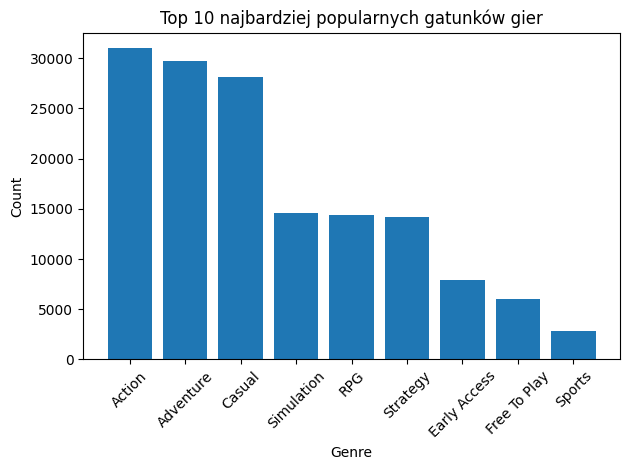

In [106]:
df2 = df1.rename_axis('genre').reset_index(name = 'count')
plt.bar(df2['genre'], df2['count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 najbardziej popularnych gatunków gier')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Otrzymuję więc, że najczęściej występujacymi gatunkami wśród gier jest akcja oraz przygodowe, co jest spodziewane.

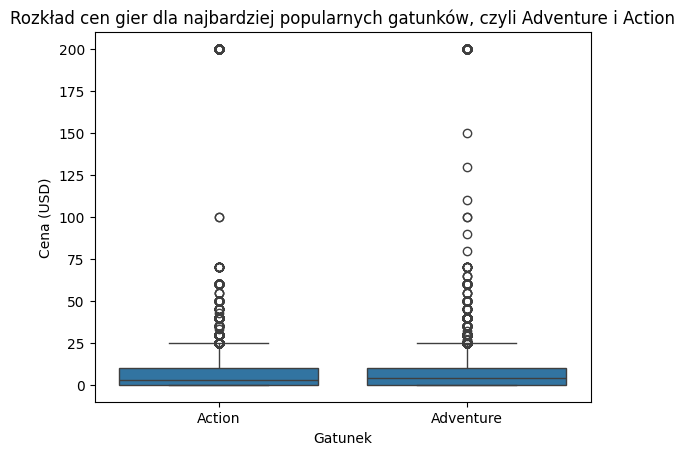

In [127]:
df3 = df.explode('genres')
df3 = df3[(df3['genres'] == 'Action' )| (df3['genres'] == 'Adventure')]
sns.boxplot(data = df3, y = 'price_initial (USD)',x = 'genres')
plt.title('Rozkład cen gier dla najbardziej popularnych gatunków, czyli Adventure i Action')
plt.xlabel('Gatunek')
plt.ylabel('Cena (USD)')
plt.show()          

Otrzymujemy więc, że ceny tych gier w obu gatunkach średnio sa podobne, jedynie Adventure ma więcej outliers niż Action

<Axes: xlabel='categories', ylabel='review_score'>

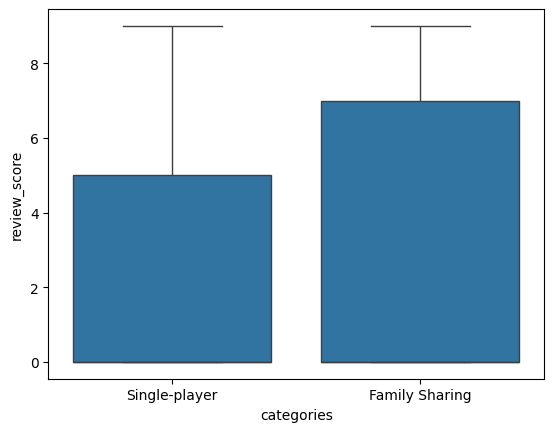

In [137]:
#df['categories'] = df['categories'].apply(ast.literal_eval)
df5 = df.explode('categories').reset_index(drop=True)
df5 = df5[(df5['categories'] == 'Single-player')| (df5['categories'] == 'Family Sharing')]
sns.boxplot(data = df5, x = 'categories', y = 'review_score')
plt.xlabel('Kategoria gry')
plt.ylabel('Ilość ocen')